<div style="background-color:#f0f8ff; padding:10px; border-radius:10px;">
  <h1 style="text-align:center; color:#1a5276;">
    📈 MSFT Analysis
  </h1>
</div>

In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [2]:
import warnings
import pandas as pd
from utils.ticker_analyzer import TickerAnalyzer
from eda.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# variable
TICKER= 'MSFT'

In [5]:
#paths
RAW_DATA_PATH='../../data/raw/yfinance_data/'+TICKER+'_historical_data.csv'
CLEANED_DATA_PATH='../../data/interim/'+TICKER+'_historical_cleaned_data.csv'

### 📌 Project Overview

#### AAPL Ticker Analysis 📊

**Objective:**  
This notebook applies the `TickerAnalyzer` class to analyze Apple Inc. (AAPL) stock performance. The analysis integrates:

- Historical price data via `yfinance`
- Technical indicators using `ta`
- News sentiment analysis with `VADER`
- Visualization of price movements vs. sentiment trends

**Period:** Last 6 months (daily intervals)  
**Tools:** Python, `yfinance`, `ta`, `vaderSentiment`, `matplotlib`

---


## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [6]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/financial-news-sentiment-analysis/data/raw/yfinance_data/MSFT_historical_data.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (9672, 9)


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


### Dataset Overview

In [7]:
#view sample data
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
6228,2010-11-19,25.799999,25.830000,25.600000,25.690001,19.783030,52423200,0.0,0.0
1139,1990-09-13,0.805556,0.812500,0.791667,0.798611,0.492419,49867200,0.0,0.0
350,1987-07-31,0.335069,0.335069,0.319444,0.326389,0.201249,186624000,0.0,0.0
1575,1992-06-04,2.567708,2.572917,2.552083,2.554688,1.575205,41755200,0.0,0.0
7201,2014-10-03,45.980000,46.299999,45.610001,46.090000,39.407825,32453200,0.0,0.0
8721,2020-10-16,220.149994,222.289993,219.320007,219.660004,212.196777,26057900,0.0,0.0
3525,2000-02-23,46.750000,47.875000,46.031250,47.125000,29.056974,75847200,0.0,0.0
120,1986-09-03,0.095486,0.095486,0.091146,0.093750,0.057806,18316800,0.0,0.0
2169,1994-10-10,3.398438,3.460938,3.398438,3.421875,2.109908,39480000,0.0,0.0
5946,2009-10-08,25.440001,25.900000,25.219999,25.670000,19.279100,60521300,0.0,0.0


In [8]:
#see the last rows
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0
9671,2024-07-30,427.720001,429.049988,417.359985,422.920013,422.159119,32687600,0.0,0.0


In [9]:
#shape of the dataset
df.shape

(9672, 9)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [11]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,9672.0,5.840220e+01,9.012230e+01,8.854200e-02,5.695313e+00,2.730500e+01,4.668750e+01,4.670000e+02
High,9672.0,5.900307e+01,9.095864e+01,9.201400e-02,5.770508e+00,2.760000e+01,4.710000e+01,4.683500e+02
Low,9672.0,5.778476e+01,8.923255e+01,8.854200e-02,5.617188e+00,2.708500e+01,4.613867e+01,4.644600e+02
Close,9672.0,5.841768e+01,9.014679e+01,9.027800e-02,5.695313e+00,2.734188e+01,4.665719e+01,4.675600e+02
Adj Close,9672.0,5.271937e+01,9.006646e+01,5.566487e-02,3.511695e+00,1.914554e+01,3.833904e+01,4.667188e+02
Volume,9672.0,5.677678e+07,3.814123e+07,2.304000e+06,3.206982e+07,4.990225e+07,7.071788e+07,1.031789e+09
Dividends,9672.0,2.981803e-03,4.652388e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.080000e+00
Stock Splits,9672.0,1.757651e-03,5.794370e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00


In [12]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
Date,9672,9672,1986-03-13,1


In [13]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB


In [14]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

Date            9672
Volume          9480
Adj Close       7568
Close           5939
Open            5790
Low             5745
High            5725
Dividends         21
Stock Splits       3
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [15]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [16]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
Date,0,0.00%
Open,0,0.00%
High,0,0.00%
Low,0,0.00%
Close,0,0.00%
Adj Close,0,0.00%
Volume,0,0.00%
Dividends,0,0.00%
Stock Splits,0,0.00%


### Missing Values

In [17]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage


### Duplicates

In [18]:
#count duplicates
dq.count_duplicates()

0

### Invalid Values

In [19]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [20]:
#saving the original dataset for later use
df_original=df.copy()

### Inconsistencies and Inaccuracies

In [21]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [22]:
df=dq.convert_columns_to_datetime()

[Date] Converted: 9672/9672 (0 became NaT)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          9672 non-null   datetime64[ns, UTC]
 1   Open          9672 non-null   float64            
 2   High          9672 non-null   float64            
 3   Low           9672 non-null   float64            
 4   Close         9672 non-null   float64            
 5   Adj Close     9672 non-null   float64            
 6   Volume        9672 non-null   int64              
 7   Dividends     9672 non-null   float64            
 8   Stock Splits  9672 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1)
memory usage: 680.2 KB


In [24]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [25]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
8245,2018-11-26 00:00:00+00:00,104.790001,106.629997,104.580002,106.470001,100.554047,32336200,0.0,0.0
418,1987-11-05 00:00:00+00:00,0.340278,0.355903,0.338542,0.350694,0.216236,81432000,0.0,0.0
6061,2010-03-25 00:00:00+00:00,29.830000,30.570000,29.799999,30.010000,22.744081,73168700,0.0,0.0
2759,1997-02-07 00:00:00+00:00,12.296875,12.562500,12.187500,12.546875,7.736324,62448000,0.0,0.0
2918,1997-09-25 00:00:00+00:00,16.609375,16.765625,16.507812,16.593750,10.231607,39272000,0.0,0.0
8663,2020-07-27 00:00:00+00:00,201.470001,203.970001,200.860001,203.850006,196.449097,30160900,0.0,0.0
622,1988-08-26 00:00:00+00:00,0.352431,0.359375,0.352431,0.356771,0.219983,24451200,0.0,0.0
9531,2024-01-08 00:00:00+00:00,369.299988,375.200012,369.010010,374.690002,372.653351,23134000,0.0,0.0
1563,1992-05-18 00:00:00+00:00,2.307292,2.364583,2.302083,2.348958,1.448353,37526400,0.0,0.0
9500,2023-11-21 00:00:00+00:00,375.670013,376.220001,371.119995,373.070007,371.042145,28423100,0.0,0.0


In [26]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

## 6. Analyze

In [27]:
# Load the ticker analyze
ta = TickerAnalyzer("AAPL")
ta.load_price_data_from_csv(CLEANED_DATA_PATH)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13 00:00:00+00:00,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14 00:00:00+00:00,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17 00:00:00+00:00,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18 00:00:00+00:00,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19 00:00:00+00:00,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9667,2024-07-24 00:00:00+00:00,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0
9668,2024-07-25 00:00:00+00:00,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0
9669,2024-07-26 00:00:00+00:00,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0
9670,2024-07-29 00:00:00+00:00,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0


In [28]:
# Instantiate the analyzer for a specific ticker (ticker is mostly for metadata here)
analyzer = TickerAnalyzer(ticker="AAPL", period="1y", interval="1d")

In [29]:
# Load Price Data from CSV
price_df = analyzer.load_price_data_from_csv(CLEANED_DATA_PATH)

print("Price Data Sample:")
print(price_df.head())

Price Data Sample:
                       Date      Open      High       Low     Close  \
0 1986-03-13 00:00:00+00:00  0.088542  0.101563  0.088542  0.097222   
1 1986-03-14 00:00:00+00:00  0.097222  0.102431  0.097222  0.100694   
2 1986-03-17 00:00:00+00:00  0.100694  0.103299  0.100694  0.102431   
3 1986-03-18 00:00:00+00:00  0.102431  0.103299  0.098958  0.099826   
4 1986-03-19 00:00:00+00:00  0.099826  0.100694  0.097222  0.098090   

   Adj Close      Volume  Dividends  Stock Splits  
0   0.059946  1031788800        0.0           0.0  
1   0.062087   308160000        0.0           0.0  
2   0.063158   133171200        0.0           0.0  
3   0.061552    67766400        0.0           0.0  
4   0.060482    47894400        0.0           0.0  


In [30]:
# Add Technical Indicators ===
analyzer.price_df.rename(
    columns={
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume'
    }, inplace=True)
price_with_indicators = analyzer.add_technical_indicators()
print("\nPrice Data with Technical Indicators Sample:")
print(price_with_indicators[['Date', 'Close','momentum_rsi', 'Volume','trend_macd']].head())


Price Data with Technical Indicators Sample:
                       Date     Close  momentum_rsi      Volume  trend_macd
0 1986-03-13 00:00:00+00:00  0.097222           NaN  1031788800         NaN
1 1986-03-14 00:00:00+00:00  0.100694           NaN   308160000         NaN
2 1986-03-17 00:00:00+00:00  0.102431           NaN   133171200         NaN
3 1986-03-18 00:00:00+00:00  0.099826           NaN    67766400         NaN
4 1986-03-19 00:00:00+00:00  0.098090           NaN    47894400         NaN


{'Cumulative Return': 4199.051744886396, 'Annualized Volatility': 0.3353677248890819, 'Sharpe Ratio': 0.7598702737807871, 'Max Drawdown': -0.7456453369396807, 'Calmar Ratio': 5631.432984105257}


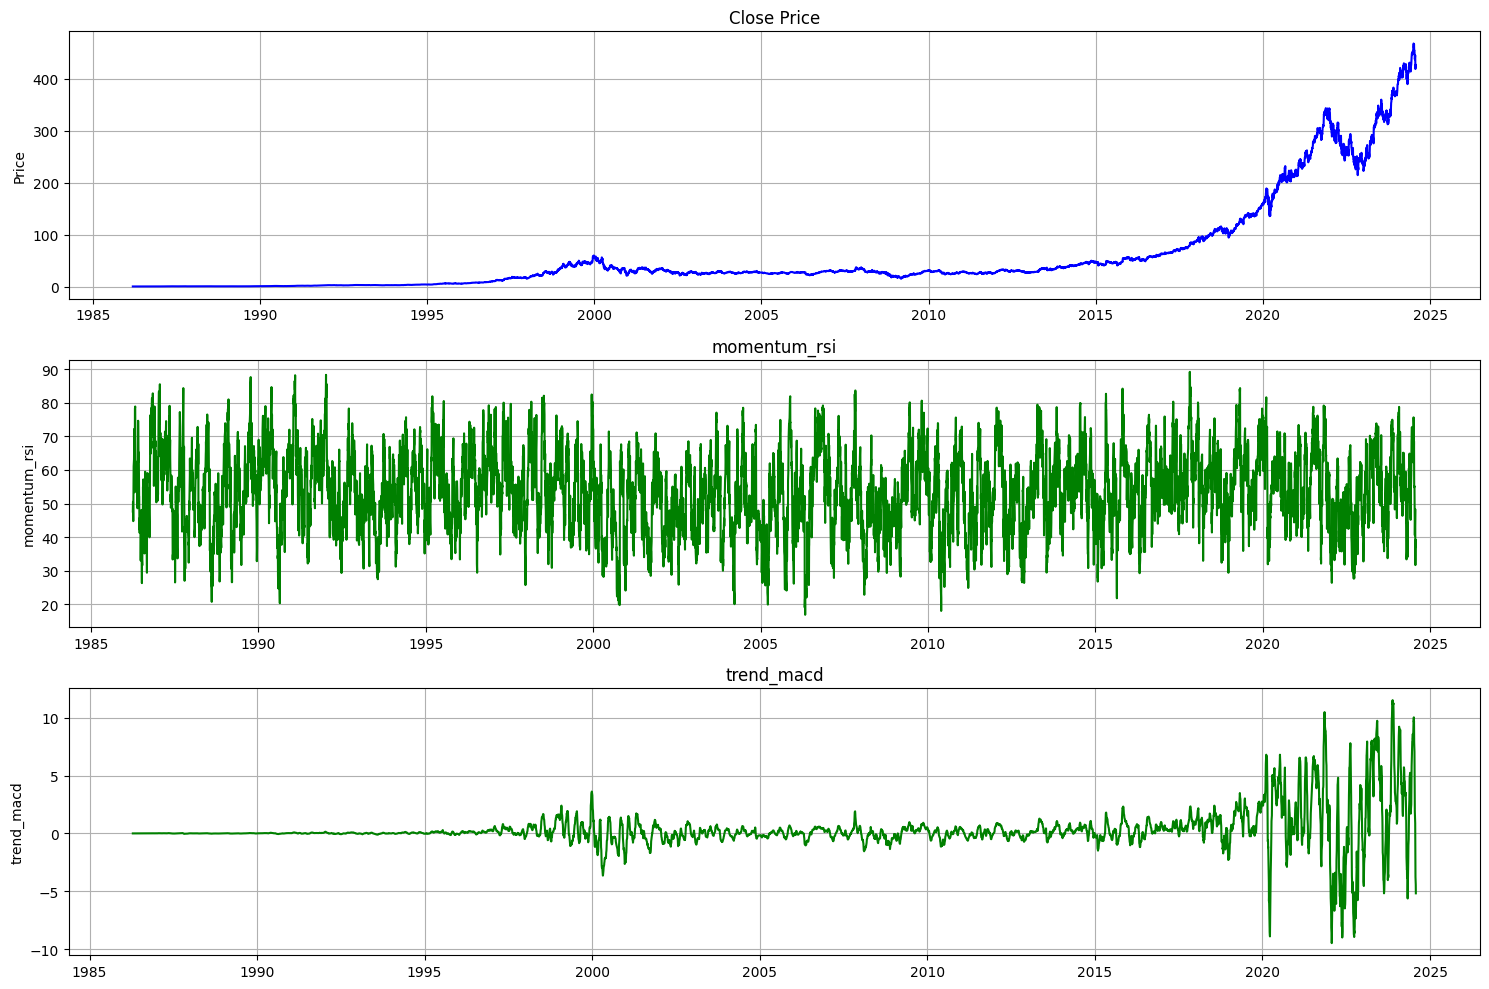

In [31]:
metrics = analyzer.compute_financial_metrics()
print(metrics)
analyzer.plot_price_and_indicators()